Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. You can add a new cell and set the type as "Markdown" so you can include your answers in this notebook.

Below, please fill in your name:

In [1]:
NAME = "Alexey Adamsky"

## Assignment 3 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze data on the passengers aboard the Titanic.

Use the .csv file provided. The definition of all variables can be found below:


- survival --> Survival --> 0 = No, 1 = Yes
- pclass --> Ticket class --> 1 = 1st, 2 = 2nd, 3 = 3rd
- sex --> Sex --> M = Male, F = Female
- Age --> Age in years
- sibsp --> # of siblings / spouses aboard the Titanic
- parch --> # of parents / children aboard the Titanic
- ticket --> Ticket number
- fare --> Passenger fare --> Price paid for the fare
- cabin --> Cabin number
- embarked --> Port of Embarkation --> C = Cherbourg, Q = Queenstown, S = Southampton

The main purpose of this assignment is to identify which passengers were more likely to survive the Titanic.

**Part 1.**  _(25 points)_
* Import the data into a pandas DataFrame (1 point)

* Use the describe() and info() functions to assess the data. What can you conclude? (2 points)

* Write a function to identify how many men vs. women were on board, and how many survived in each group (3 points)

* Write a function to identify how many men vs. women were traveling with families of 3 or more members, and how many were traveling alone or in pairs (3 points)

* Write a function to identify how many passengers departed from each of the 3 ports (1 point)

* Write a function to identify how many passengers were in each class (can be inferred from the cabin variable) (1 point)

* Write a function toidentify how many passengers paid high vs. low fare tickets (1 point)

* Define a function to classify each person in an age group with the following groupings: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 60+. Add a new column in the DataFrame which identifies each person's age group. Then, count the number of survivalists in each age group (8 points)

* Now that you have some basic information about the passengers, conduct additional analysis to identify which passengers were most likely to survive. You should assess all the variables provided and anchor on the Survived variable. As a hint, you should also combine variables. For example, were all women equally as likely to survive? Or only those with larger families or those who were younger? (5 points)

**Part 2.**  _(5 points)_
* How did you approach your analysis using Python? Which functionalities did you use? Why?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import the data into a pandas DataFrame

In [2]:
titanic = pd.read_csv('TitanicData.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Use the describe() and info() functions to assess the data. What can you conclude?

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


#### Based on `.describe()`
A few thigs we can quickly opbserve here:
- Average age of the passangers was `~29` year old.
- Only `~40%` of passangers have survived.
- The oldest passanger was `80` years old and the youngest was a newborn.
- Most passangers were `20-40` years old.
- Majority of people were traveled without their family members.
- Most people did not pay a premium price, where as some paid a way above above avaraga price for their ticket. And some people even got a ticket for free (could that be the staff?).
- Most people were in the 3rd or 2nd class.

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.1+ KB


In [8]:
print(f'Cabin Missing Values: {100*185/714:.2f}%')

Cabin Missing Values: 25.91%


#### Based on `.info()`
We can see that **"Cabin"** information is only provided for 185 passangers (~25.9%). This column can probably be ignored for the future analysis, because it is missing for most passangers and is probably meaningless otherwise.

We can also see that there are a several missing values in the **"Embarked"** column. This column is categorical with three possible values (*C = Cherbourg, Q = Queenstown, S = Southampton*), which means we could probably "safely" populate these with random values. This is unlikely to affect an analysis where this column is used.

---

### Write a function to identify how many men vs. women were on board, and how many survived in each group

In [9]:
m_count = titanic[titanic["Sex"] == "male"].agg({"Sex": "count"})
m_count

Sex    453
dtype: int64

In [10]:
f_count = titanic[titanic["Sex"] == "female"].agg({"Sex": "count"})
f_count

Sex    261
dtype: int64

AttributeError: 'DataFrame' object has no attribute 'map'

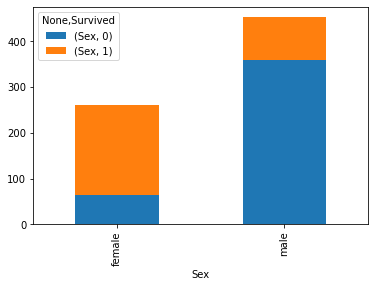

In [33]:
survival_per_sex = titanic.groupby(["Sex", "Survived"]).agg({"Sex": "count"})
survival_per_sex.unstack().plot(kind='bar',stacked=True);

In [34]:
def survivalRate(sex):
    return 100 * survival_per_sex["Sex"][sex].loc[1] / survival_per_sex["Sex"][sex].sum()

print(f'Female Survival Rate: {survivalRate("female"):.2f}%')
print(f'Male Survival Rate: {survivalRate("male"):.2f}%')

Female Survival Rate: 75.48%
Male Survival Rate: 20.53%


---

### Write a function to identify how many men vs. women were traveling with families of 3 or more members, and how many were traveling alone or in pairs

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic_fam = titanic
titanic_fam["fam_count"] = titanic["SibSp"] + titanic["Parch"]

In [37]:
fam_of_3 = titanic_fam[titanic_fam["fam_count"] >= 3]
fam_of_3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_count
6,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
12,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,6
15,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,5
21,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,4
22,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,6


In [38]:
fam_of_1_or_0 = titanic_fam[titanic_fam["fam_count"] <= 1]
fam_of_1_or_0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [39]:
from pandas import DataFrame

def groupBySex(df:DataFrame):
    return df.groupby("Sex").agg({"Sex": "count"}).rename(columns={ "Sex": "Count" })

def getFamCount(df:DataFrame, sex):
    return df.loc[sex]["Count"]

fam_of_3_counts = groupBySex(fam_of_3)
fam_of_1_or_0_counts = groupBySex(fam_of_1_or_0)

In [40]:
print(f'{getFamCount(fam_of_3_counts, "male")} men and {getFamCount(fam_of_3_counts, "female")} women were travelling with 3 or more family members.')
print(f'{getFamCount(fam_of_1_or_0_counts, "male")} men and {getFamCount(fam_of_1_or_0_counts, "female")} women were travelling alone or with in a pair.')

33 men and 45 women were travelling with 3 or more family members.
371 men and 172 women were travelling alone or with in a pair.


---

### Write a function to identify how many passengers departed from each of the 3 ports

<AxesSubplot:xlabel='Embarked'>

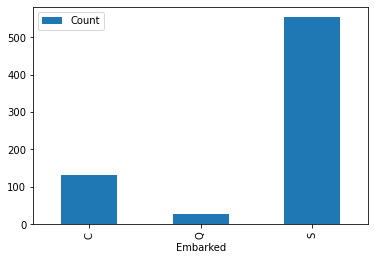

In [46]:
titanic.groupby("Embarked").agg({"Embarked": "count"}).rename(columns={ "Embarked": "Count" }).plot(kind='bar')

---

### Write a function to identify how many passengers were in each class (can be inferred from the cabin variable)

<AxesSubplot:xlabel='Pclass'>

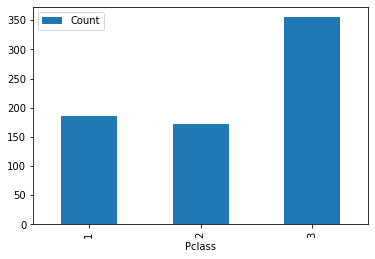

In [47]:
titanic.groupby("Pclass").agg({"Pclass": "count"}).rename(columns={ "Pclass": "Count" }).plot(kind='bar')

---

### Write a function to identify how many passengers paid high vs. low fare tickets

In [95]:
fairs = titanic["Fare"]
paid_avg = fairs.mean()
paid_below_avg = fairs[fairs < paid_avg].count()
paid_above_avg = fairs[fairs > paid_avg].count()

print(f'{paid_above_avg} passangers paid above average fare, while {paid_below_avg} passangers paid below the average fare.')

172 passangers paid above average fare, while 542 passangers paid below the average fare.


---

### Define a function to classify each person in an age group with the following groupings: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 60+. Add a new column in the DataFrame which identifies each person's age group. Then, count the number of survivalists in each age group

In [96]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [48]:
def ageGroup(age):
    if age <= 10:
        return '0-10'
    elif age <= 20:
        return '11-20'
    elif age <= 30:
        return '21-30'
    elif age <= 40:
        return '31-40'
    elif age <= 50:
        return '41-50'
    elif age <= 60:
        return '51-60'
    else:
        return '60+'

titanic['AgeGroup'] = titanic['Age'].apply(ageGroup)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_count,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,31-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,31-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,31-40


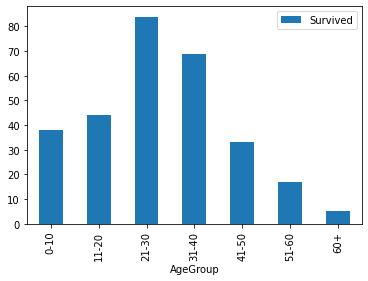

In [70]:
survival_per_age_group = titanic[titanic['Survived'] == 1].groupby(["AgeGroup"]).agg({"AgeGroup": "count"}).rename(columns={"AgeGroup":"Survived"})#.sort_values("Count", ascending=False)
survival_per_age_group.plot(kind='bar', stacked=True);

---

### Now that you have some basic information about the passengers, conduct additional analysis to identify which passengers were most likely to survive. You should assess all the variables provided and anchor on the Survived variable. As a hint, you should also combine variables. For example, were all women equally as likely to survive? Or only those with larger families or those who were younger?

In [71]:
import seaborn as sns

In [76]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'fam_count',
       'AgeGroup'],
      dtype='object')

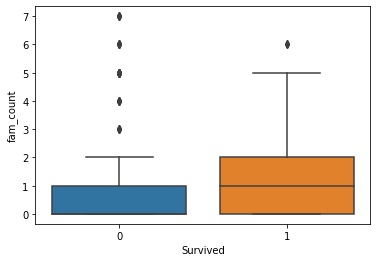

In [78]:
sns.boxplot(x='Survived', y='fam_count', data=titanic);

In [ ]:
# gender
    # age group
        # family size
        # single traveler
        # class
        # fare

In [113]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_count,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,31-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,31-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,31-40



* (1 point)

*  (1 point)

*  (1 point)

*  (8 points)

* (5 points)

**Part 2.**  _(5 points)_
* How did you approach your analysis using Python? Which functionalities did you use? Why?